# Tic Tac Toe Game (Noughts and Crosses)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from platform import python_version

from gamelearner import *
python_version()

'3.6.6'

## Game dynamics

In [2]:
game = TicTacToeGame()
game

TicTacToeGame()

In [3]:
game.roles

[1, 2]

In [4]:
game.marks

['X', 'O']

In [5]:
game.state

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int8)

In [6]:
game.make_move((1, (0, 2)))
game.make_move((2, (0, 1)))
game.make_move((1, (1, 1)))
game.make_move((2, (2, 2)))

In [7]:
game.show_state()

_ O X
_ X _
_ _ O


In [8]:
game.check_if_game_over()

False

In [9]:
game.show_moves()

1 (1, (0, 2))
2 (2, (0, 1))
3 (1, (1, 1))
4 (2, (2, 2))


In [10]:
game.turn

1

In [11]:
game.available_moves()

[(0, 0), (1, 0), (1, 2), (2, 0), (2, 1)]

In [12]:
try:
    game.make_move((2, (2,0)))
except ValueError as err:
    print(err)

It is not player 2's turn.


In [13]:
game.make_move((1, (2,0)))
game.show_state()

_ O X
_ X _
X _ O


In [14]:
game.game_over

True

In [15]:
print(game.winner)

1


In [16]:
game.get_rewards()

{1: 1.0, 2: 0.0}

In [17]:
game.reverse_move()
game.reverse_move()

In [18]:
game.show_state()

_ O X
_ X _
_ _ _


In [19]:
game.make_move((2, (2,0)))
game.show_state()

_ O X
_ X _
O _ _


In [20]:
game.get_rewards()

{1: 0.0}

In [21]:
game.make_move((1, (1,2)))
game.show_state()

_ O X
_ X X
O _ _


In [22]:
game.make_move((2, (2,2)))
game.make_move((1, (1,0)))
game.show_state()

_ O X
X X X
O _ O


In [23]:
game.game_over, game.winner

(True, 1)

In [24]:
game.get_rewards()

{1: 1.0, 2: 0.0}

In [25]:
try:
    game.make_move((2, (2,1)))
except AssertionError as err:
    print(err)

Player 1 has already won


### Playing with Human Players

In [26]:
players = [HumanPlayer("Jill"), HumanPlayer("Jack")]
players

[HumanPlayer('Jill')), HumanPlayer('Jack'))]

In [27]:
game = TicTacToeGame()
game

TicTacToeGame()

In [28]:
game.show_state()
players[0].make_move(game, role=1)

_ _ _
_ _ _
_ _ _
Jill's turn (row, col): 0,0


In [29]:
game.show_state()
players[1].make_move(game, role=2)

X _ _
_ _ _
_ _ _
Jack's turn (row, col): 1,1


In [30]:
game.show_state()

X _ _
_ O _
_ _ _


### How a TDLearner player learns

In [31]:
game = TicTacToeGame()
game.show_state()

_ _ _
_ _ _
_ _ _


In [32]:
ex = ExpertPlayer("EX")
td = TDLearner("TD")

In [33]:
td.make_move(game, 1)
print("On-policy:", td.on_policy)
game.show_state()

On-policy: False
X _ _
_ _ _
_ _ _


In [34]:
td.value_function

{}

In [35]:
game.get_rewards()

{}

In [36]:
ex.make_move(game, 2)
game.show_state()

X _ _
_ O _
_ _ _


In [37]:
td.make_move(game, 1)
print("On-policy:", td.on_policy)
game.show_state()

On-policy: True
X _ X
_ O _
_ _ _


In [38]:
td.value_function

{b'SS--O----': 0.5,
 b'S-S-O----': 0.5,
 b'S--SO----': 0.5,
 b'S---OS---': 0.5,
 b'S---O-S--': 0.5,
 b'S---O--S-': 0.5,
 b'S---O---S': 0.5}

In [39]:
ex.make_move(game, 2)
game.show_state()

X O X
_ O _
_ _ _


In [40]:
td.make_move(game, 1)
print("On-policy:", td.on_policy)
game.show_state()

On-policy: True
X O X
_ O _
X _ _


In [41]:
td.value_function

{b'SS--O----': 0.5,
 b'S-S-O----': 0.5,
 b'S--SO----': 0.5,
 b'S---OS---': 0.5,
 b'S---O-S--': 0.5,
 b'S---O--S-': 0.5,
 b'S---O---S': 0.5,
 b'SOSSO----': 0.5,
 b'SOS-OS---': 0.5,
 b'SOS-O-S--': 0.5,
 b'SOS-O--S-': 0.5,
 b'SOS-O---S': 0.5}

In [42]:
while not game.game_over:
    ex.make_move(game, 2)
    if not game.game_over:
        td.make_move(game, 1)

In [43]:
game.show_state()

X O X
_ O _
X O _


In [44]:
game.game_over, game.winner

(True, 2)

In [45]:
td.value_function

{b'SS--O----': 0.5,
 b'S-S-O----': 0.5,
 b'S--SO----': 0.5,
 b'S---OS---': 0.5,
 b'S---O-S--': 0.5,
 b'S---O--S-': 0.5,
 b'S---O---S': 0.5,
 b'SOSSO----': 0.5,
 b'SOS-OS---': 0.5,
 b'SOS-O-S--': 0.5,
 b'SOS-O--S-': 0.5,
 b'SOS-O---S': 0.5}

In [46]:
rewards = game.get_rewards()
rewards

{2: 1.0, 1: 0.0}

In [47]:
td.reward(game, 1, rewards[1])
td.value_function

{b'SS--O----': 0.5,
 b'S-S-O----': 0.375,
 b'S--SO----': 0.5,
 b'S---OS---': 0.5,
 b'S---O-S--': 0.5,
 b'S---O--S-': 0.5,
 b'S---O---S': 0.5,
 b'SOSSO----': 0.5,
 b'SOS-OS---': 0.5,
 b'SOS-O-S--': 0.0,
 b'SOS-O--S-': 0.5,
 b'SOS-O---S': 0.5}

## Using the game controller

In [48]:
game = TicTacToeGame()
players = [ExpertPlayer("EXP1"), ExpertPlayer("EXP2")]

In [49]:
ctrl = GameController(game, players)
ctrl

GameController(TicTacToeGame(), [ExpertPlayer('EXP1'), ExpertPlayer('EXP2')])

In [50]:
ctrl.player_roles

{ExpertPlayer('EXP1'): 1, ExpertPlayer('EXP2'): 2}

In [51]:
ctrl.play()

Game of Tic Tac Toe with 2 players ['EXP1', 'EXP2']
_ _ _
_ _ _
_ _ _
EXP1's turn (row, col): (1, (0, 2))
_ _ X
_ _ _
_ _ _
EXP2's turn (row, col): (2, (1, 1))
_ _ X
_ O _
_ _ _
EXP1's turn (row, col): (1, (2, 0))
_ _ X
_ O _
X _ _
EXP2's turn (row, col): (2, (0, 1))
_ O X
_ O _
X _ _
EXP1's turn (row, col): (1, (2, 1))
_ O X
_ O _
X X _
EXP2's turn (row, col): (2, (2, 2))
_ O X
_ O _
X X O
EXP1's turn (row, col): (1, (0, 0))
X O X
_ O _
X X O
EXP2's turn (row, col): (2, (1, 0))
X O X
O O _
X X O
EXP1's turn (row, col): (1, (1, 2))
X O X
O O X
X X O
Game over!
Draw


## Competition between computer players

In [52]:
game = TicTacToeGame()
players = [TDLearner('TD1'), ExpertPlayer('EXPERT')]
ctrl = GameController(game, players)

In [53]:
ctrl.play()

Game of Tic Tac Toe with 2 players ['TD1', 'EXPERT']
_ _ _
_ _ _
_ _ _
TD1's turn (row, col): (2, 0)
_ _ _
_ _ _
X _ _
EXPERT's turn (row, col): (2, (1, 1))
_ _ _
_ O _
X _ _
TD1's turn (row, col): (0, 0)
X _ _
_ O _
X _ _
EXPERT's turn (row, col): (2, (1, 0))
X _ _
O O _
X _ _
TD1's turn (row, col): (1, 2)
X _ _
O O X
X _ _
EXPERT's turn (row, col): (2, (2, 1))
X _ _
O O X
X O _
TD1's turn (row, col): (0, 2)
X _ X
O O X
X O _
EXPERT's turn (row, col): (2, (0, 1))
X O X
O O X
X O _
Game over!
EXPERT won


In [54]:
for player in players:
    print("\nPlayer %s" % str(player.name))
    print("  played: %d, wins: %d, losses: %d" % (player.games_played, player.games_won, player.games_lost))


Player TD1
  played: 1, wins: 0, losses: 1

Player EXPERT
  played: 1, wins: 1, losses: 0


## Train a TD Learner

In [55]:
td_learner = TDLearner('TD1')
computer_players = [td_learner, ExpertPlayer('EXPERT')]

In [56]:
train_computer_players(computer_players)


Training 2 computer players...
0 games completed
100 games completed
200 games completed
300 games completed
400 games completed
500 games completed
600 games completed
700 games completed
800 games completed
900 games completed

Results:
TD1: won 0, lost 363, drew 637
EXPERT: won 363, lost 0, drew 637


In [57]:
train_computer_players(computer_players)


Training 2 computer players...
0 games completed
100 games completed
200 games completed
300 games completed
400 games completed
500 games completed
600 games completed
700 games completed
800 games completed
900 games completed

Results:
TD1: won 0, lost 162, drew 838
EXPERT: won 162, lost 0, drew 838


## Now play against the computer!

In [58]:
game = TicTacToeGame()
players = [HumanPlayer("You"), td_learner]
ctrl = GameController(game, players)

In [59]:
while True:
    game.reset()
    ctrl.play()
    text = input("Press enter to play again or q to quit: ")
    if text.strip().lower() == 'q':
        break

print("Results")        
for player in players:
    print("\nPlayer %s" % str(player.name))
    print("  played: %d, wins: %d, losses: %d" % (player.games_played, player.games_won, player.games_lost))

Game of Tic Tac Toe with 2 players ['You', 'TD1']
_ _ _
_ _ _
_ _ _
You's turn (row, col): 0,0
X _ _
_ _ _
_ _ _
TD1's turn (row, col): (2, 2)
X _ _
_ _ _
_ _ O
You's turn (row, col): 2,0
X _ _
_ _ _
X _ O
TD1's turn (row, col): (2, 1)
X _ _
_ _ _
X O O
You's turn (row, col): 1,0
You you won!
X _ _
X _ _
X O O
Game over!
You won
Press enter to play again or q to quit: q
Results

Player You
  played: 1, wins: 1, losses: 0

Player TD1
  played: 2001, wins: 0, losses: 526


## TD Parameter Optimization

In [60]:
results = {
    'learning_rate': [],
    'off_policy_rate': [],
    'initial_values': [],
    'Wins (1000)': [],
    'Losses (1000)': [],
    'Wins (2000)': [],
    'Losses (2000)': []
}

In [61]:
initial_values = [0.0, 0.5, 1.0]
learning_rates = [0.25, 0.1, 0.0]
off_policy_rates = [0.0, 0.1]

In [62]:
for lr in learning_rates:
    for opr in off_policy_rates:
        for v0 in initial_values:
            print("\nlr: %s, opr: %s, v0: %s" % (str(lr), str(opr), str(v0)))
            print("Training against expert...")
            td_learner = TDLearner('TD', learning_rate=lr, 
                                   off_policy_rate=opr, initial_value=v0)
            computer_players = [td_learner, ExpertPlayer('EXPERT')]
            train_computer_players(computer_players, show=False)
            results['learning_rate'].append(lr)
            results['off_policy_rate'].append(opr)
            results['initial_values'].append(v0)
            results['Wins (1000)'].append(td_learner.games_won)
            results['Losses (1000)'].append(td_learner.games_lost)
            train_computer_players(computer_players, show=False)
            results['Wins (2000)'].append(td_learner.games_won)
            results['Losses (2000)'].append(td_learner.games_lost)


lr: 0.25, opr: 0.0, v0: 0.0
Training against expert...

lr: 0.25, opr: 0.0, v0: 0.5
Training against expert...

lr: 0.25, opr: 0.0, v0: 1.0
Training against expert...

lr: 0.25, opr: 0.1, v0: 0.0
Training against expert...

lr: 0.25, opr: 0.1, v0: 0.5
Training against expert...

lr: 0.25, opr: 0.1, v0: 1.0
Training against expert...

lr: 0.1, opr: 0.0, v0: 0.0
Training against expert...

lr: 0.1, opr: 0.0, v0: 0.5
Training against expert...

lr: 0.1, opr: 0.0, v0: 1.0
Training against expert...

lr: 0.1, opr: 0.1, v0: 0.0
Training against expert...

lr: 0.1, opr: 0.1, v0: 0.5
Training against expert...

lr: 0.1, opr: 0.1, v0: 1.0
Training against expert...

lr: 0.0, opr: 0.0, v0: 0.0
Training against expert...

lr: 0.0, opr: 0.0, v0: 0.5
Training against expert...

lr: 0.0, opr: 0.0, v0: 1.0
Training against expert...

lr: 0.0, opr: 0.1, v0: 0.0
Training against expert...

lr: 0.0, opr: 0.1, v0: 0.5
Training against expert...

lr: 0.0, opr: 0.1, v0: 1.0
Training against expert...


In [63]:
df = pd.DataFrame(results)
df

,learning_rate,off_policy_rate,initial_values,Wins (1000),Losses (1000),Wins (2000),Losses (2000)
0,0.25,0.0,0.0,0,220,0,220
1,0.25,0.0,0.5,0,218,0,218
2,0.25,0.0,1.0,0,402,0,454
3,0.25,0.1,0.0,0,468,0,664
4,0.25,0.1,0.5,0,367,0,523
5,0.25,0.1,1.0,0,452,0,658
6,0.10,0.0,0.0,0,355,0,361
7,0.10,0.0,0.5,0,224,0,224
8,0.10,0.0,1.0,0,456,0,585
9,0.10,0.1,0.0,0,451,0,668


In [64]:
good_results = {
    'After 1000 iterations:': df['Losses (1000)'].idxmin(),
    'After 2000 iterations:': df['Losses (2000)'].idxmin()
}
good_results

{'After 1000 iterations:': 1, 'After 2000 iterations:': 1}

## Look at learning rates

In [65]:
td_players = [TDLearner("TD %d" % i) for i in range(4)]
rd = RandomPlayer("Random")
ex = ExpertPlayer("Expert")

opponents = [rd, ex, td_players[3]]

In [66]:
td_players[0:3], opponents

([TDLearner('TD 0'), TDLearner('TD 1'), TDLearner('TD 2')],
 [RandomPlayer('Random'), ExpertPlayer('Expert'), TDLearner('TD 3')])

In [67]:
import datetime

# This can take a long time!
start_time = datetime.datetime.now()
print("Start time:", start_time)

scores = {}
index = []
n_iter = 500

def player_key(p1, p2):
    return "%s vs. %s" % (p1.name, p2.name)

for td_player, opponent in zip(td_players[0:3], opponents):
    scores[player_key(td_player, opponent)] = [test_player(td_player)]
scores[ex.name] = [test_player(ex)]

index.append(td_player.games_played)

iteration = 0
iterations = [0]

for epoch in range(50):
    
    for td_player, opponent in zip(td_players[0:3], opponents):
        train_computer_players([td_player, opponent], iterations=n_iter,
                               show=False)
        key = "%s vs. %s" % (td_player.name, opponent.name)
        scores[key].append(test_player(td_player))
    scores[ex.name].append(test_player(ex))

    index.append(td_player.games_played)
    iteration += n_iter
    iterations.append(iteration)
    print(iteration, "%5.2f %5.2f %5.2f %5.2f" % tuple(s[-1] for s in 
                                                     scores.values()))

print("End time:", datetime.datetime.now() - start_time)

Start time: 2018-10-06 16:35:35.235189
500  0.03  0.24  0.02  0.98
1000  0.10  0.29  0.10  0.96
1500  0.10  0.34  0.10  0.92
2000  0.23  0.35  0.14  0.92
2500  0.34  0.39  0.19  0.94
3000  0.49  0.30  0.25  0.98
3500  0.43  0.29  0.11  0.90
4000  0.66  0.39  0.11  0.88
4500  0.45  0.31  0.23  0.96
5000  0.64  0.41  0.42  0.92
5500  0.67  0.30  0.36  0.92
6000  0.57  0.36  0.32  0.94
6500  0.76  0.32  0.27  0.92
7000  0.60  0.34  0.37  0.92
7500  0.56  0.41  0.51  0.98
8000  0.55  0.29  0.64  0.94
8500  0.37  0.31  0.59  0.94
9000  0.30  0.36  0.62  0.98
9500  0.60  0.32  0.58  0.98
10000  0.60  0.38  0.52  0.92
10500  0.58  0.39  0.66  0.98
11000  0.65  0.39  0.61  0.98
11500  0.64  0.37  0.61  1.00
12000  0.56  0.38  0.49  0.94
12500  0.55  0.27  0.62  0.96
13000  0.61  0.32  0.59  0.96
13500  0.66  0.35  0.76  0.92
14000  0.63  0.37  0.58  0.94
14500  0.60  0.34  0.74  0.94
15000  0.55  0.46  0.73  0.98
15500  0.59  0.49  0.70  0.98
16000  0.44  0.36  0.73  0.94
16500  0.78  0.41  0.

In [68]:
pd.DataFrame(scores, index=index).head()

,TD 0 vs. Random,TD 1 vs. Expert,TD 2 vs. TD 3,Expert
0,0.016800,0.009280,0.009744,0.96
500,0.033480,0.239616,0.021384,0.98
1000,0.102336,0.293888,0.097680,0.96
1500,0.104192,0.342720,0.095472,0.92
2000,0.232320,0.350784,0.144704,0.92


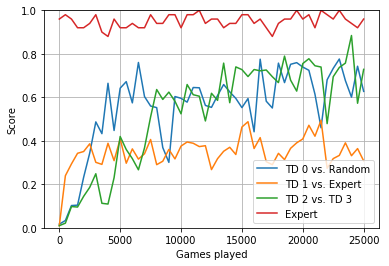

In [69]:
pd.DataFrame(scores, index=iterations).plot()
plt.xlabel("Games played")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid()
plt.savefig("learning_rates.pdf")

In [ ]:
td = TDLearner("TD1")
players = [ExpertPlayer("EX1"), RandomPlayer("R1"), td]

In [90]:
train_computer_players(players, iterations=10000)


Training 3 computer players...
0 games completed
100 games completed
200 games completed
300 games completed
400 games completed
500 games completed
600 games completed
700 games completed
800 games completed
900 games completed
1000 games completed
1100 games completed
1200 games completed
1300 games completed
1400 games completed
1500 games completed
1600 games completed
1700 games completed
1800 games completed
1900 games completed
2000 games completed
2100 games completed
2200 games completed
2300 games completed
2400 games completed
2500 games completed
2600 games completed
2700 games completed
2800 games completed
2900 games completed
3000 games completed
3100 games completed
3200 games completed
3300 games completed
3400 games completed
3500 games completed
3600 games completed
3700 games completed
3800 games completed
3900 games completed
4000 games completed
4100 games completed
4200 games completed
4300 games completed
4400 games completed
4500 games completed
4600 games com

In [94]:
td.games_played

19880

In [95]:
len(td.value_function)

4892

In [96]:
pd.Series(td.value_function).value_counts().head(10)

0.500000    1777
0.000000    1168
1.000000     579
0.375000     234
0.625000     180
0.718750      57
0.250000      46
0.789062      31
0.531250      27
0.281250      19
dtype: int64

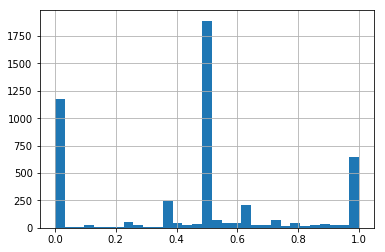

In [97]:
pd.Series(td.value_function).hist(bins=31)